In [1]:
# Import required libraries
# requirements are
# pandas>=0.19
# scikit_learn>=0.18

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [ ]:
# Read data
df = pd.read_csv('../resources/Products.csv', 
                 usecols=['Product title', 'Category', 'description', 'description-short'])

In [ ]:
# Print out product' categories with theirs #occurences
df.Category.value_counts()

In [ ]:
# Add target column with numerical representation product' category
mapped_values = {index: value for value, index in enumerate(df.Category.unique())}

df['target'] = df.Category.map(mapped_values)

In [ ]:
# Add data column with aggregated text from featured columns
# Product title, description, and description-short
df['data'] = df[['Product title', 'description', 'description-short']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
# Split dataset into train and test sets (80/20)
df_train, df_test = train_test_split(df, test_size = 0.2)

# Create vector representation of text "Bag of words"
vectorizer = TfidfVectorizer(sublinear_tf=True, 
                             max_df=0.5,
                             stop_words='english')

# Calculate TFIDF scores for tokens in product' data description
# for both train and test sets
X_train = vectorizer.fit_transform(df_train.data.as_matrix())
X_test = vectorizer.transform(df_test.data.as_matrix())

# Create train and test labels for classifier
y_train, y_test = df_train.target, df_test.target

# Create Multinomial Naive Bayes model (can be changed by anyoneelse model)
clf = MultinomialNB(alpha=.01)

# Train model
clf.fit(X_train, y_train)

# Get predicted values from pretrainded model
pred = clf.predict(X_test)

# Print out model' evaluation metrics (confusion matrix and precision/recall/f1-score)
# print(metrics.classification_report(y_test, pred))
# print(metrics.confusion_matrix(y_test, pred))

metrics.accuracy_score(y_test, pred)

In [ ]:
# Print out test product with predicted product' categories
# Category - text representation of product' category
# target - numerical representation of an actual product' category
# predicted - numerical representation of an predicted product' category
df_test['predicted'] = pred
df_test.copy()

In [ ]:
{x: {k:v for k,v in zip(clf.classes_.tolist(), a.tolist()[0])} for x in df_test.data}

In [ ]:
train_set = df_train[['target', 'data']]
train_set.rename(columns={'target': 'label', 'data': 'text'}, inplace=True)
train_set.to_csv('../resources/train_set.csv', index=False)

df_test
test_set = df_test[['data', 'target']]
test_set.rename(columns={'target': 'label', 'data': 'text'}, inplace=True)
test_set.to_csv('../resources/test_set.csv', index=False)

In [ ]:
print(metrics.classification_report(y_test, pred))

In [4]:
import xml.etree.ElementTree as ET


xml_data = '/Users/alex/Downloads/googleshopping-s1-sv.xml'

tree = ET.parse(xml_data)
root = tree.getroot()

items = list()
columns = set()

for i in root.getchildren()[0].findall('item'):
    item = dict()
    for j in i.getchildren():
        columns.add(j.tag)
        if j.tag in item:
            item[j.tag] = '{}, {}'.format(item.get(j.tag), j.text)
        else:
            item[j.tag] = j.text
            
    items.append(item)
        
df = pd.DataFrame(items, columns=columns)
df.to_csv('googleshopping.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73794 entries, 0 to 73793
Data columns (total 17 columns):
{http://base.google.com/ns/1.0}shipping                   73794 non-null object
description                                               71910 non-null object
{http://base.google.com/ns/1.0}google_product_category    73794 non-null object
{http://base.google.com/ns/1.0}condition                  73794 non-null object
{http://base.google.com/ns/1.0}shipping_weight            72055 non-null object
{http://base.google.com/ns/1.0}identifier_exists          4 non-null object
{http://base.google.com/ns/1.0}brand                      73794 non-null object
title                                                     73794 non-null object
{http://base.google.com/ns/1.0}gtin                       71806 non-null object
{http://base.google.com/ns/1.0}mpn                        73785 non-null object
link                                                      73794 non-null object
{http://base.go

In [11]:
# df = df[['title', 'description', '{http://base.google.com/ns/1.0}product_type']].rename(columns={'{http://base.google.com/ns/1.0}product_type': 'category'}).fillna('')

mapped_values = {index: value for value, index in enumerate(df.category.unique())}
df['target'] = df.category.map(mapped_values)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73794 entries, 0 to 73793
Data columns (total 4 columns):
title          73794 non-null object
description    73794 non-null object
category       73794 non-null object
target         73794 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


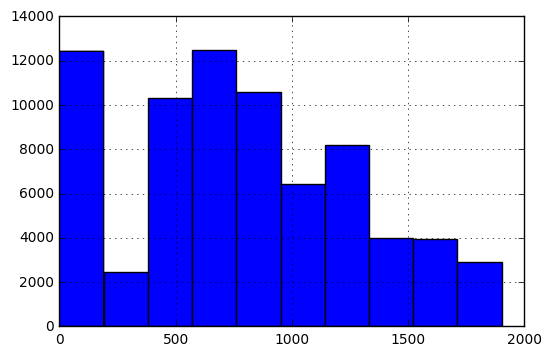

In [13]:
%matplotlib inline

df.target.hist()

In [18]:
df.target.apply(sum)

TypeError: 'int' object is not iterable

In [ ]:
# Add target column with numerical representation product' category


In [ ]:
# Add data column with aggregated text from featured columns
# Product title, description, and description-short
x['data'] = x[['title', 'description']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
# Split dataset into train and test sets (80/20)
x_train, x_test = train_test_split(x, test_size = 0.2)

# Create vector representation of text "Bag of words"
vectorizer = TfidfVectorizer(sublinear_tf=True, 
                             max_df=0.5,
                             stop_words='english')

# Calculate TFIDF scores for tokens in product' data description
# for both train and test sets
X_train = vectorizer.fit_transform(x_train.data.as_matrix())
X_test = vectorizer.transform(x_test.data.as_matrix())

# Create train and test labels for classifier
y_train, y_test = x_train.target, x_test.target

# Create Multinomial Naive Bayes model (can be changed by anyoneelse model)
clf = MultinomialNB(alpha=.01)

# Train model
clf.fit(X_train, y_train)

# Get predicted values from pretrainded model
pred = clf.predict(X_test)

# Print out model' evaluation metrics (confusion matrix and precision/recall/f1-score)
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

In [ ]:
x.category.value_counts()